# TA Review 1
*2/18/2024*

## FINM 37500 - 2025

### UChicago Financial Mathematics

* Burak Sekerci
* bsekerci@uchicago.edu

### Agenda
**Lecture 1 Topics**
- From Black Scholes Model to Black's Model and Beyond
- Caps and Forward Volatility
 <br>

## From Black Scholes Model to Black's Model and Beyond

![Screenshot 2025-02-16 at 10.49.06 AM.png](<attachment:Screenshot 2025-02-16 at 10.49.06 AM.png>)
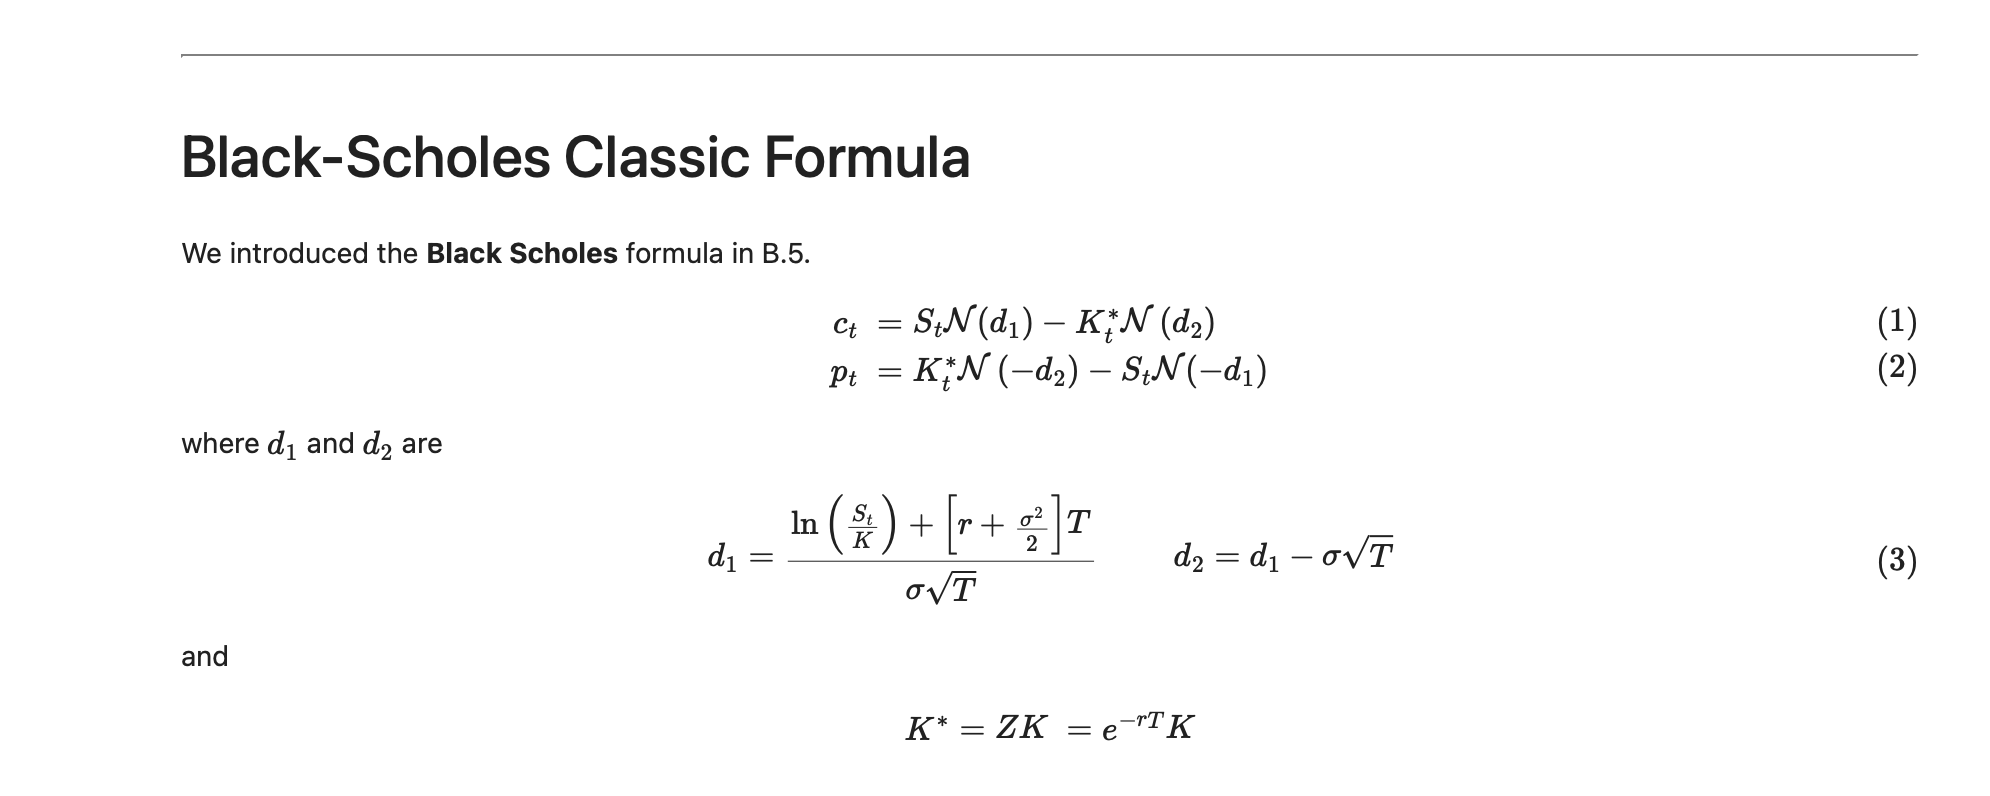

We start with our classic formula. This formulation follows directly from the assumptions of constant volatility and constant risk-free rate and is derived using the martingale approach in risk-neutral pricing. However when it comes to pricing interest rate derivatives we have a few key issues:
1. *Black-Scholes Requires a Traded Underlying Asset*
 - The Black-Scholes model assumes:
	-	The underlying asset (e.g., a stock) can be continuously traded.
	-	The price of the underlying follows a geometric Brownian motion (GBM) under the risk-neutral measure.
- For an interest rate derivative, however:
	-	The interest rate itself is not a traded asset. You can’t buy or sell “the interest rate” directly.
	-	Interest rates are instead inferred from bond prices or swap rates.
	-	The Black-Scholes formula cannot directly handle an asset that is a computed quantity rather than a tradable security.

2. *No Arbitrage-Free Replicating Portfolio for Interest Rate Derivatives*

- One of the key ideas behind Black-Scholes pricing is the ability to create a replicating portfolio using the underlying asset and a risk-free bond. This portfolio allows us to hedge the option perfectly.

- However, for interest rate derivatives:
	-	There is no single traded security whose price follows a lognormal process like a stock.
	-	The underlying (e.g., interest rate, forward rate, or yield) is derived from multiple securities (e.g., bonds, swaps, etc.).
	-	A replicating portfolio must consist of a dynamic combination of multiple bonds or swaps, making Black-Scholes inapplicable.

- Thus, the standard Black-Scholes hedging argument breaks down.

3. *Forward Prices and Interest Rates Evolve Differently*

- In Black-Scholes:
	-	The key assumption is that  S_t  follows geometric Brownian motion under the risk-neutral measure.

- For interest rates, the evolution is very different:
	-	Interest rates are modeled differently than a stock price. These models recognize that interest rates do not exhibit the unbounded exponential growth that stocks do.
	-	Instead, interest rates tend to revert to some long-term mean.

 - This mean-reverting behavior is inconsistent with Black-Scholes’ assumptions.

- To price options on interest rate products (like caps, floors, and swaptions), we need a model that:
	-	Works with forward rates instead of spot prices.
	-	Accounts for the fact that interest rates are not directly tradable.
	-	Uses a martingale measure change to remove dependency on the risk-free rate.

![Screenshot 2025-02-16 at 11.03.46 AM.png](<attachment:Screenshot 2025-02-16 at 11.03.46 AM.png>)
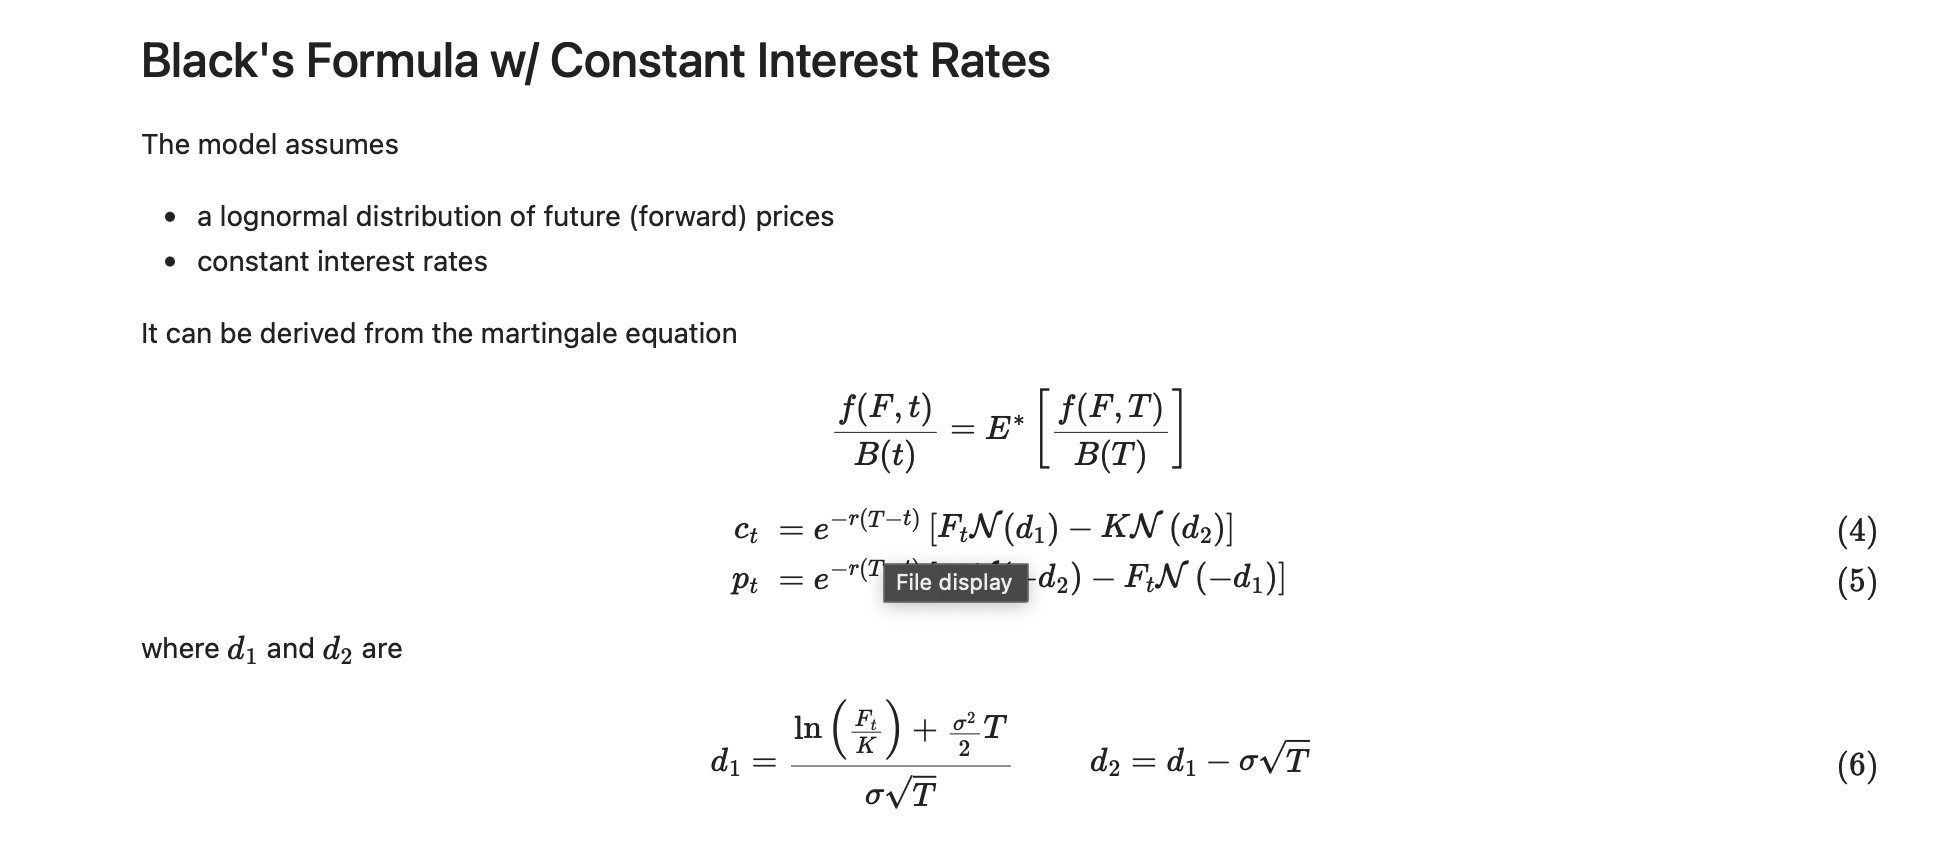

- Black 76 with constant interest rates helps with the first two points of above. Key Differences from Black-Scholes:
	1.	The underlying is a forward price  F_t  instead of a spot price  S_t .
	2.	There is no drift term in the SDE for  F_t  (since in expectation it remains unchanged under the risk neutral world).
	3.	The discounting factor  e^{-rT}  appears explicitly.

However this is still not enough as this assumes constant interest rates, even though we know interest rates themselves have a stochastic process involved with them. When we include the stochastic nature of the interest rates the equation becomes problematic: 

![Screenshot 2025-02-16 at 11.08.27 AM.png](<attachment:Screenshot 2025-02-16 at 11.08.27 AM.png>)
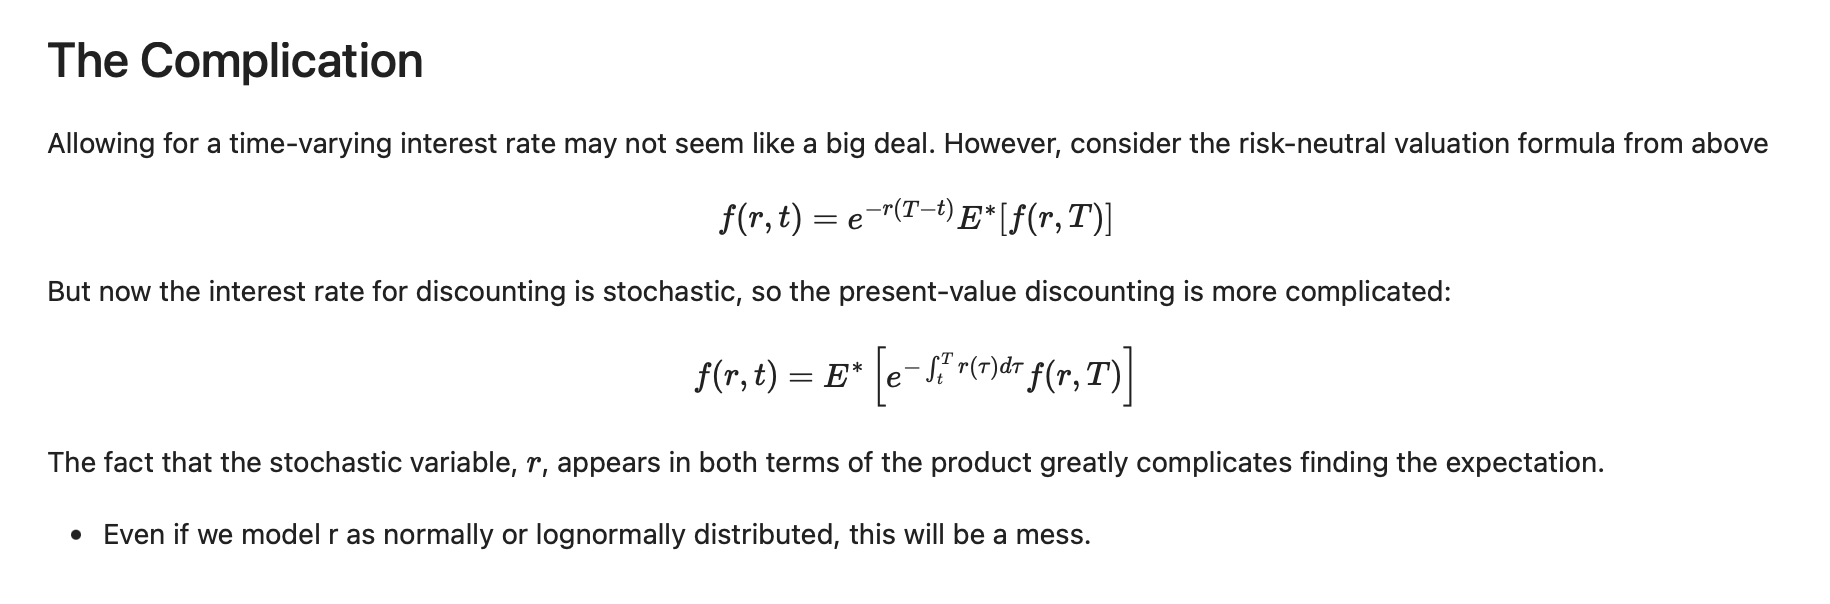

Which brings us to a change of measures an the final version of our model. 

![Screenshot 2025-02-16 at 11.09.32 AM.png](<attachment:Screenshot 2025-02-16 at 11.09.32 AM.png>)
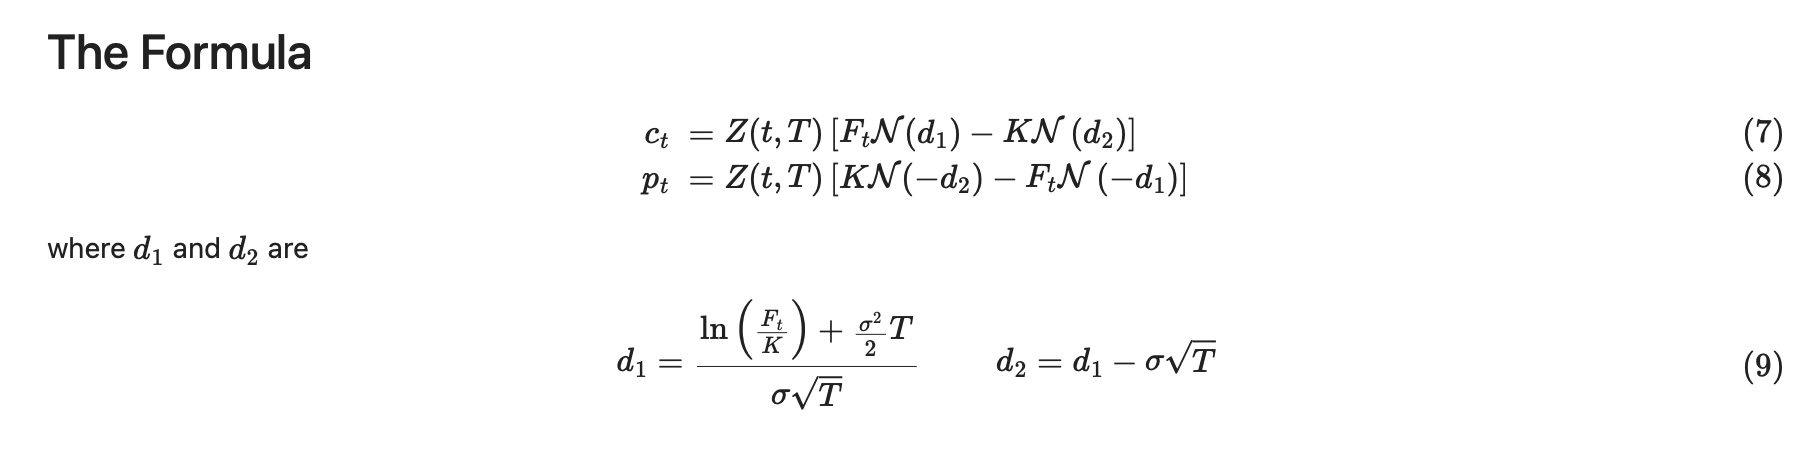

While Black-76 is useful, its pricing method still relies on the risk-neutral measure. For interest rate derivatives, it’s often more convenient to price under the forward measure.

Why Change to the Forward Measure?

-	In Black-76, we still discount expected payoffs using  e^{-rT} , which assumes a constant risk-free rate.
-	In practice, interest rates are stochastic, making discounting with  e^{-rT}  problematic.
-	Using the forward measure  allows us to price instruments without explicitly discounting at a stochastic rate.

![Screenshot 2025-02-16 at 11.11.41 AM.png](<attachment:Screenshot 2025-02-16 at 11.11.41 AM.png>)
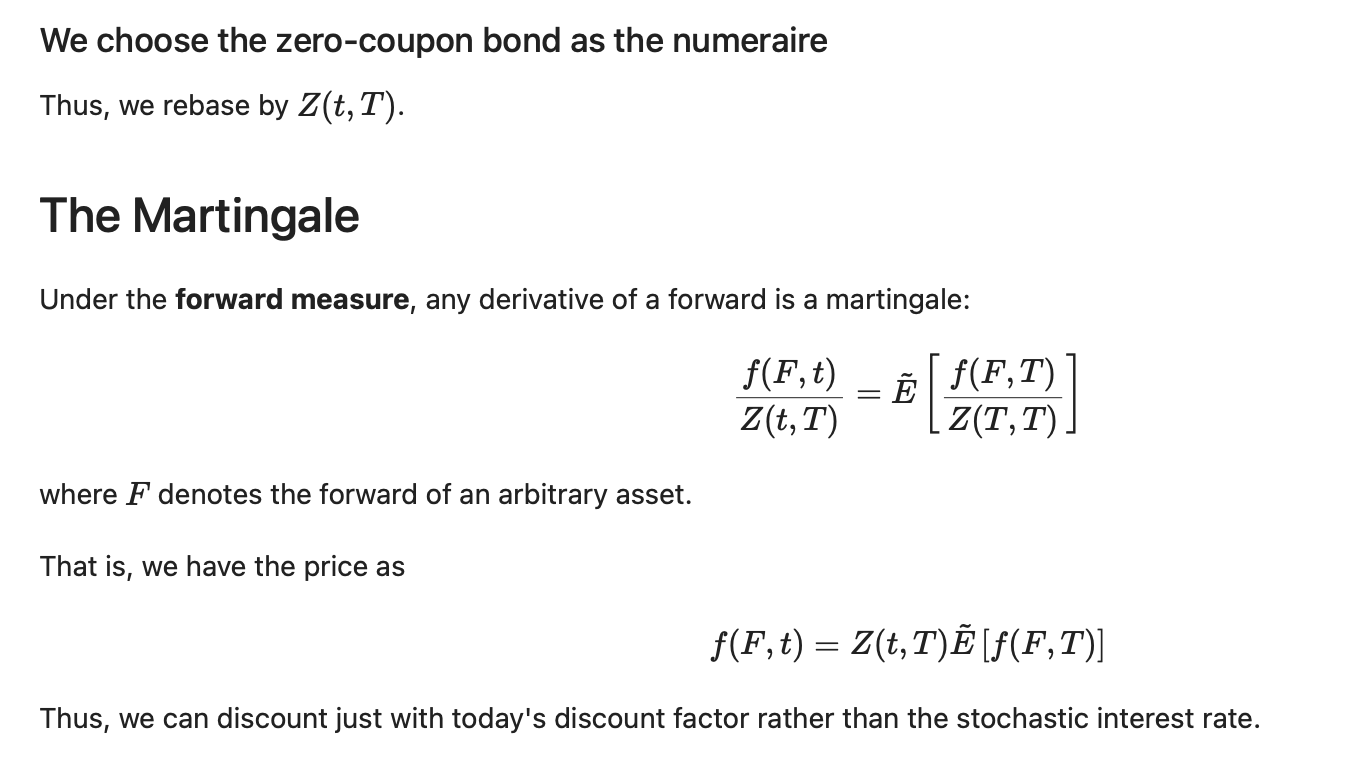

#### Final Summary: The Three-Step Transition ####

1.	Black-Scholes (1973):
	-	Works for stocks and tradable securities.
	-	Uses spot price  S_t .
	-	Prices under the risk-neutral measure.
	-   Black-Scholes is for spot-traded securities. It fails for interest rates and forward contracts.
2.	Black-76 (1976):
	-	Adapts Black-Scholes for futures and forward contracts.
	-	Uses forward price  F_t.
	-	No drift term since forward prices are martingales under risk neutral measure.
	-   Black-76 fixes this by using forward prices, but still relies on discounting with a constant risk-free rate.
3.	Forward Measure via Girsanov’s Theorem:
	-	Removes the need for explicit discounting.
	-	Transforms the measure to forward measure.
	-	Forward prices become martingales under the forward measure.
	-   The forward measure (via Girsanov’s theorem) removes explicit discounting, making it ideal for pricing interest rate derivatives.

## Caps and Forward Volatility

A caplet is a call option on an interest rate. It's payoff:

![Screenshot 2025-02-16 at 1.40.37 PM.png](<attachment:Screenshot 2025-02-16 at 1.40.37 PM.png>)
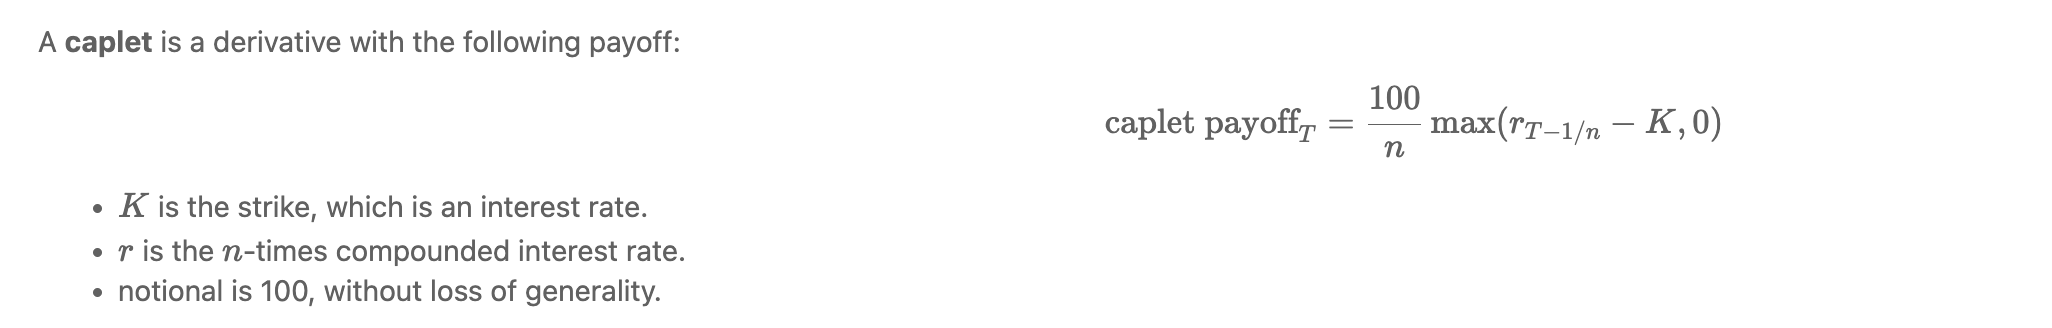

A floorlet is a put option on an interest rate. It's payoff: 

![Screenshot 2025-02-16 at 1.41.19 PM.png](<attachment:Screenshot 2025-02-16 at 1.41.19 PM.png>)
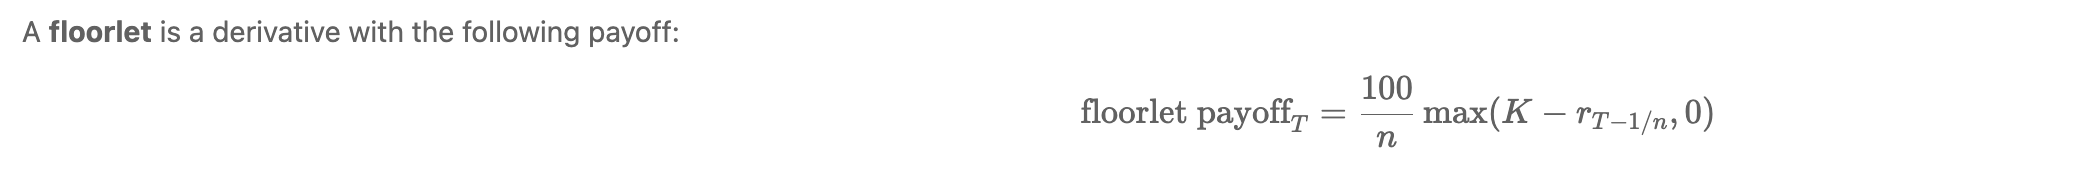

The key here is that the interest rate is compounded at the frequency n and is in arrears. Which means there will be some discounting to do for hte payoffs. 

- Caps and Floors as Interest Rate Options
	-	Caps are portfolios of caplets each with the same strike but at different maturities. 
	-	Floors are portfolios of floorlets each with the same strike but at different maturities. 

	-	These options are priced using Black’s formula under the forward measure.

### Cap Timing ###

The timing of caplet payments introduces two key implications when pricing caps and floors. These arise from the structure of interest rate fixings and the payment conventions in cap contracts.

1. The First Caplet is Missing from the Cap

	Why Doesn’t a Cap Include the First Caplet?

	Caps are structured as a series of European call options (caplets) on forward interest rates. However, unlike standard options where the strike applies to the current spot price, caplets reference forward rates, meaning:

		-	The first interest rate fixing occurs at the start of the contract.
		-	The first payment occurs at the first reset date, but this amount was already determined before the contract started.
		-	The first rate is already known at time  t=0 , so there’s no uncertainty to hedge against!

	You must correctly account for the first missing caplet when summing caplets to determine the full cap price.

2. Discounting the Final Payoff by the Risk-Free Rate

    Why is Discounting Needed?

    A caplet’s payoff is given at the end of the accrual period, not at the fixing time. This means:

	    -	At time  T_i , we observe the rate  r_i  and determine whether the caplet is in the money.
	    -	However, the actual payoff is made at  T_{i+1} .
	    -	Since we price options at time  t=0 , all future payoffs must be discounted to present value.

![Screenshot 2025-02-16 at 2.15.02 PM.png](<attachment:Screenshot 2025-02-16 at 2.15.02 PM.png>)
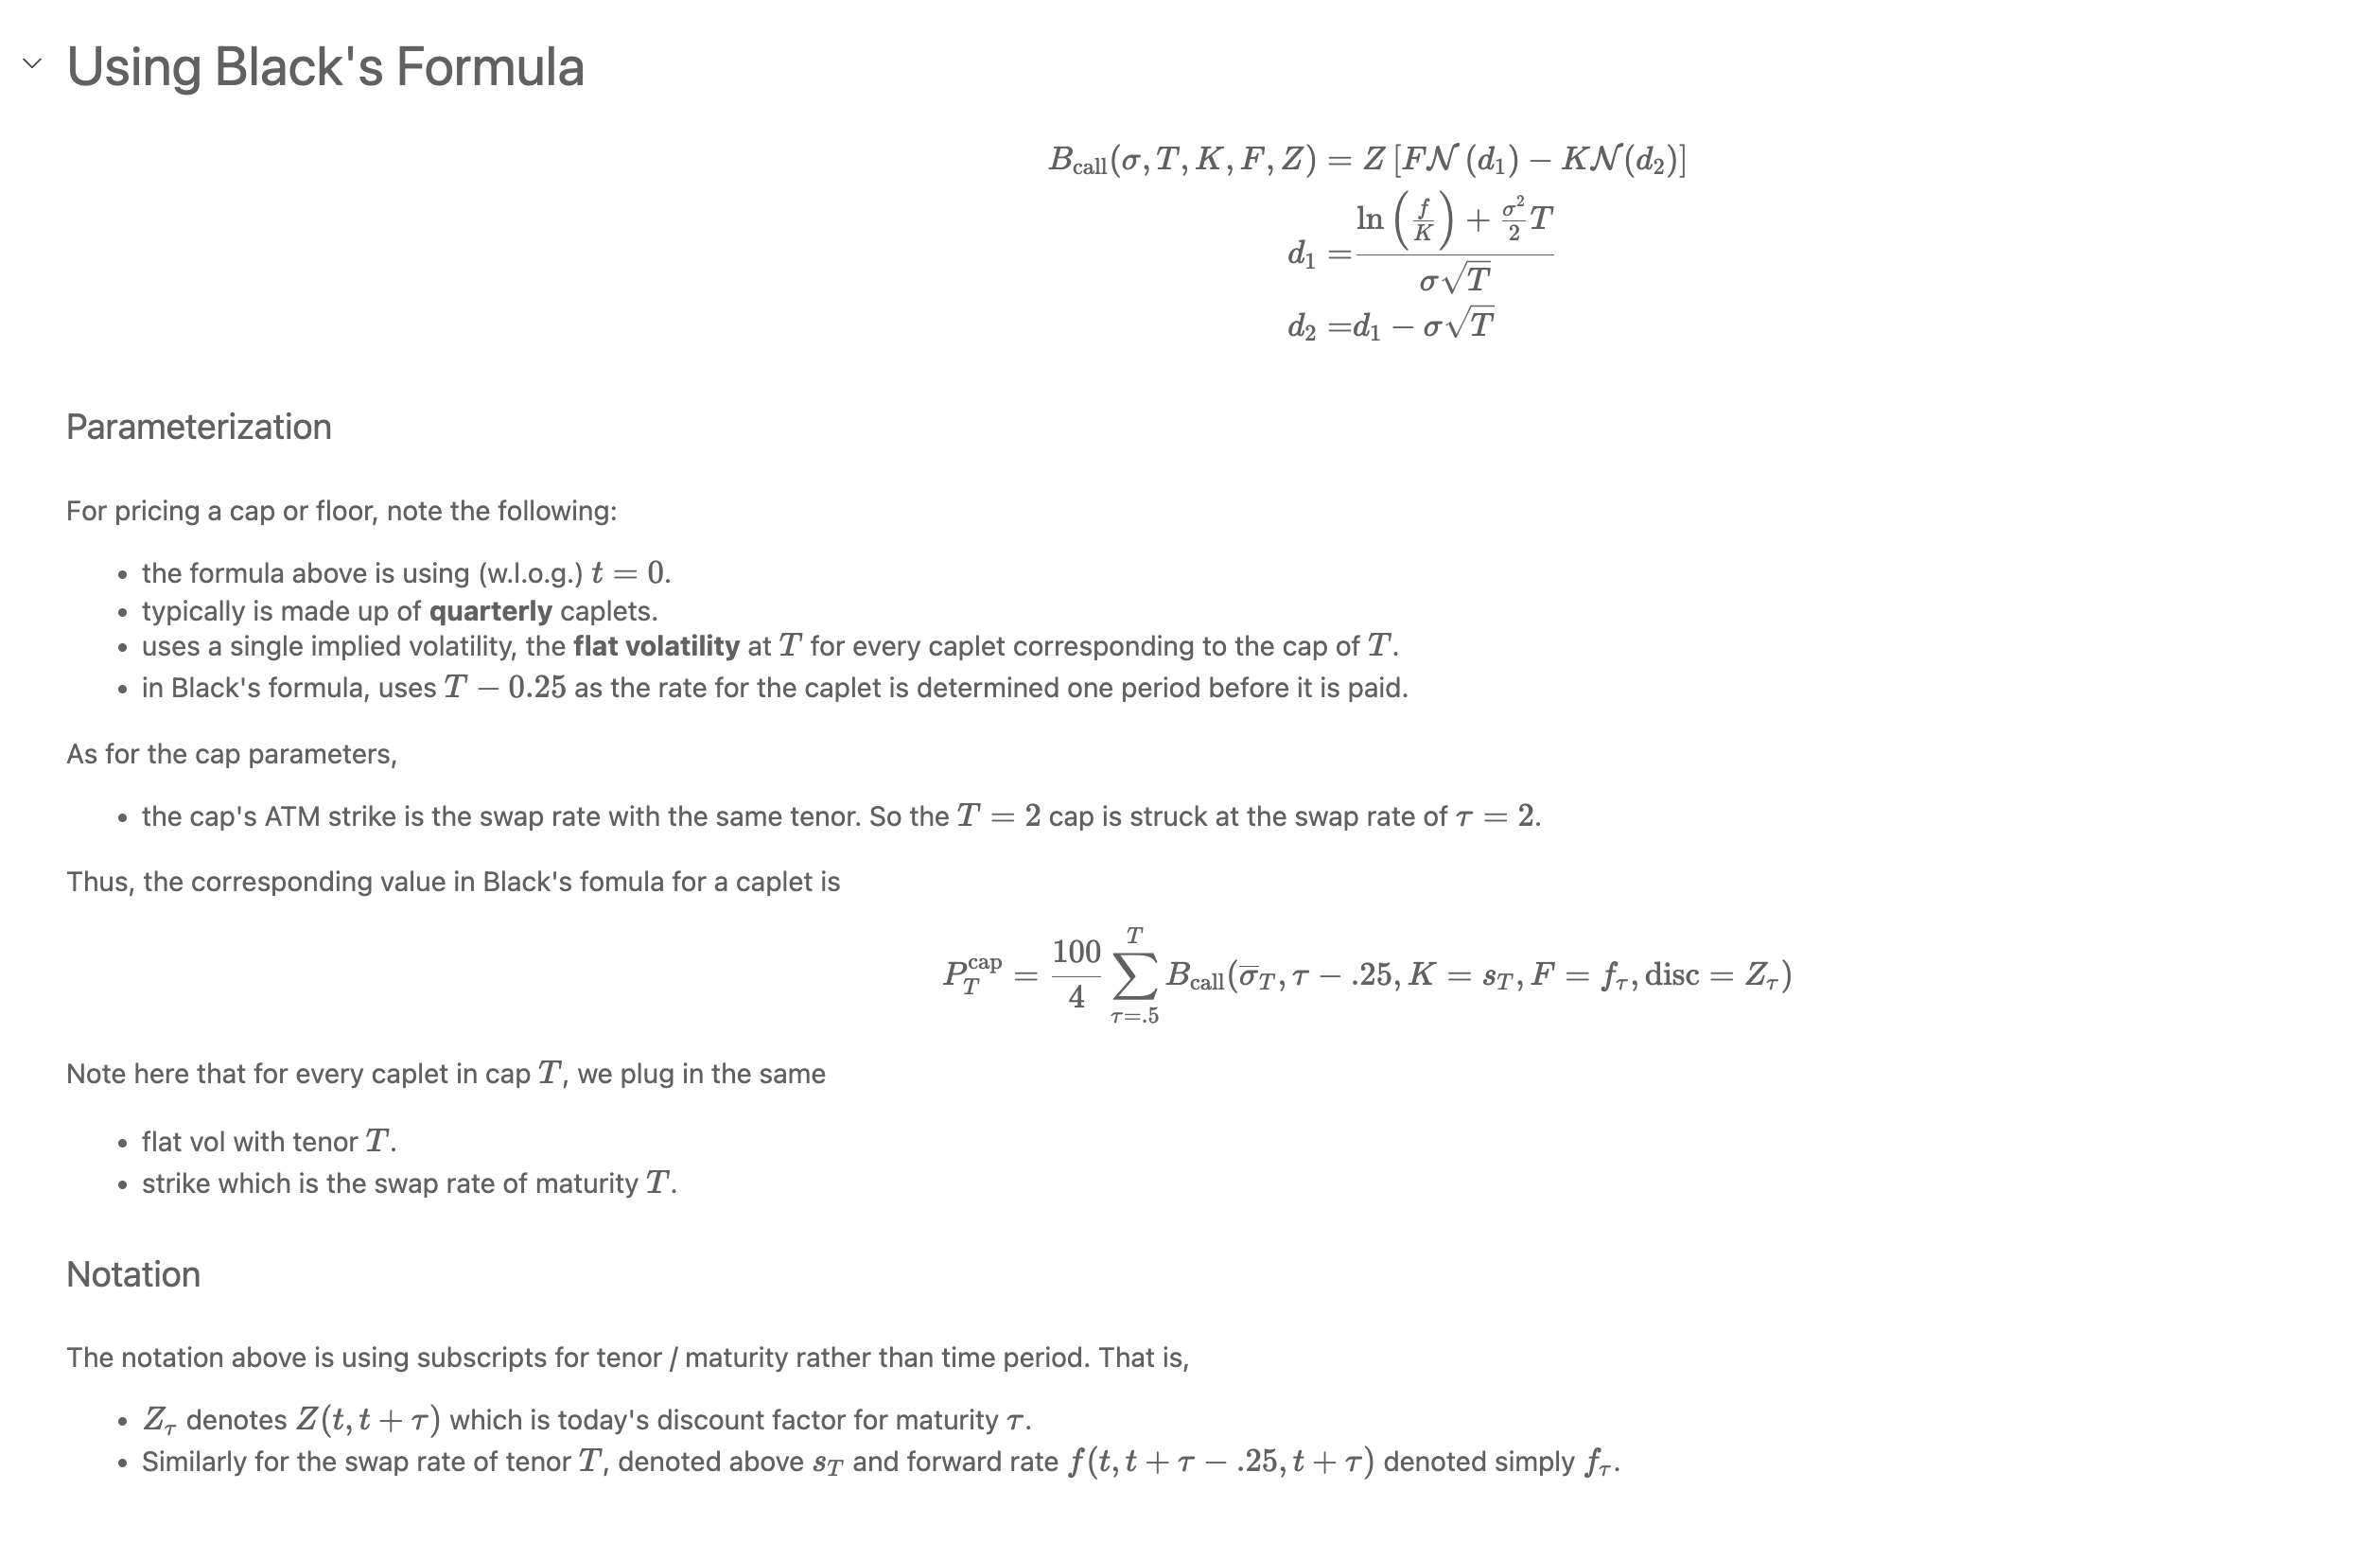

### What is flat volatility? 

The **flat** volatility is the **implied** volatility that matches the market price of a given **cap** or **floor**.

This is very similar to the YTM when pricing a bond. 

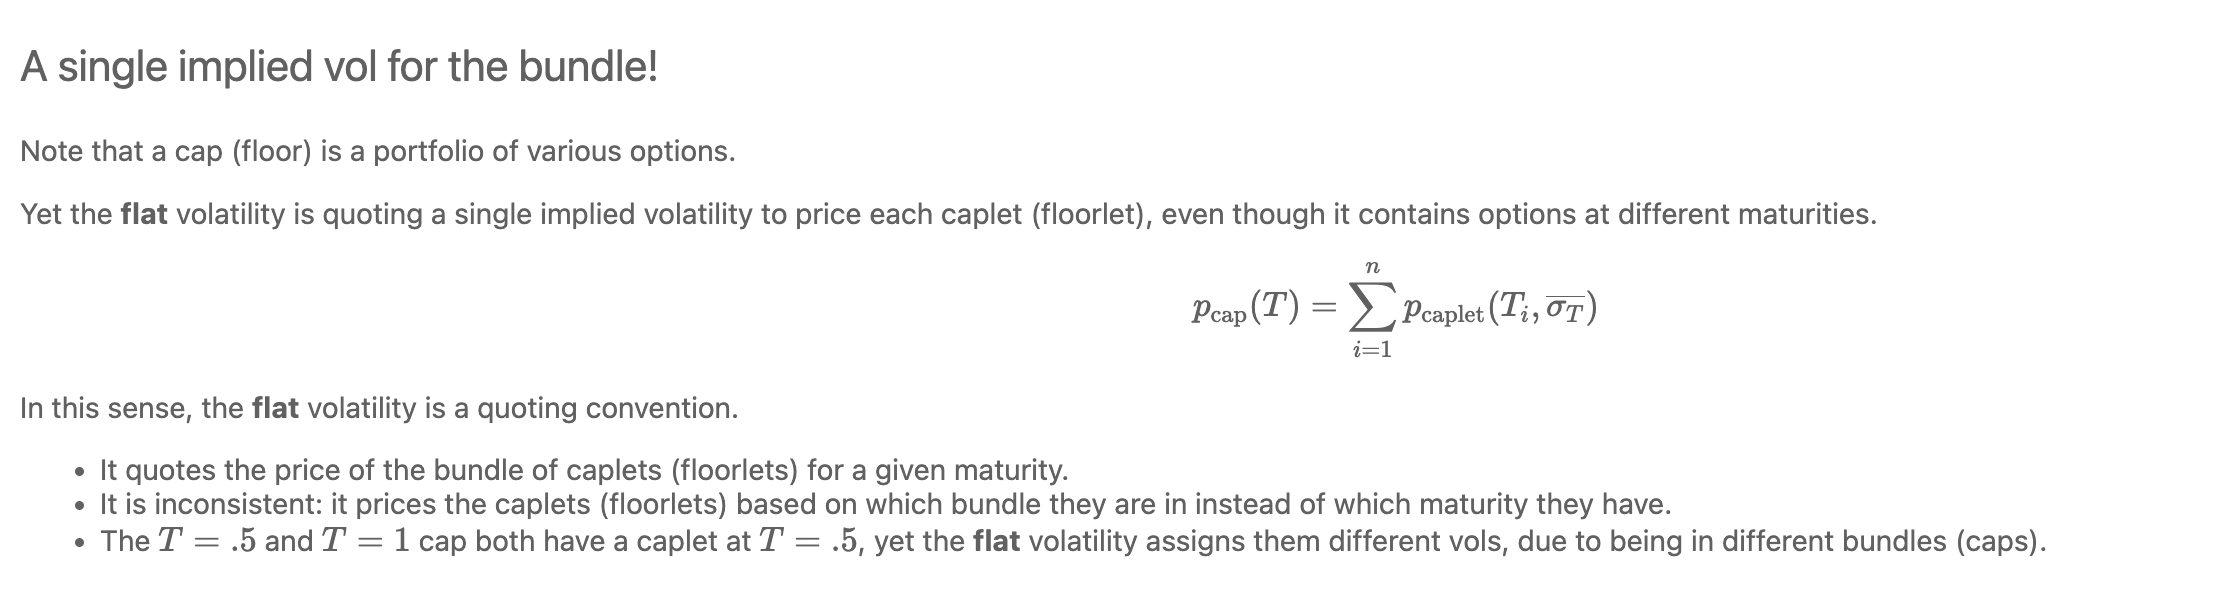

![Screenshot 2025-02-16 at 2.54.52 PM.png](<attachment:Screenshot 2025-02-16 at 2.54.52 PM.png>)
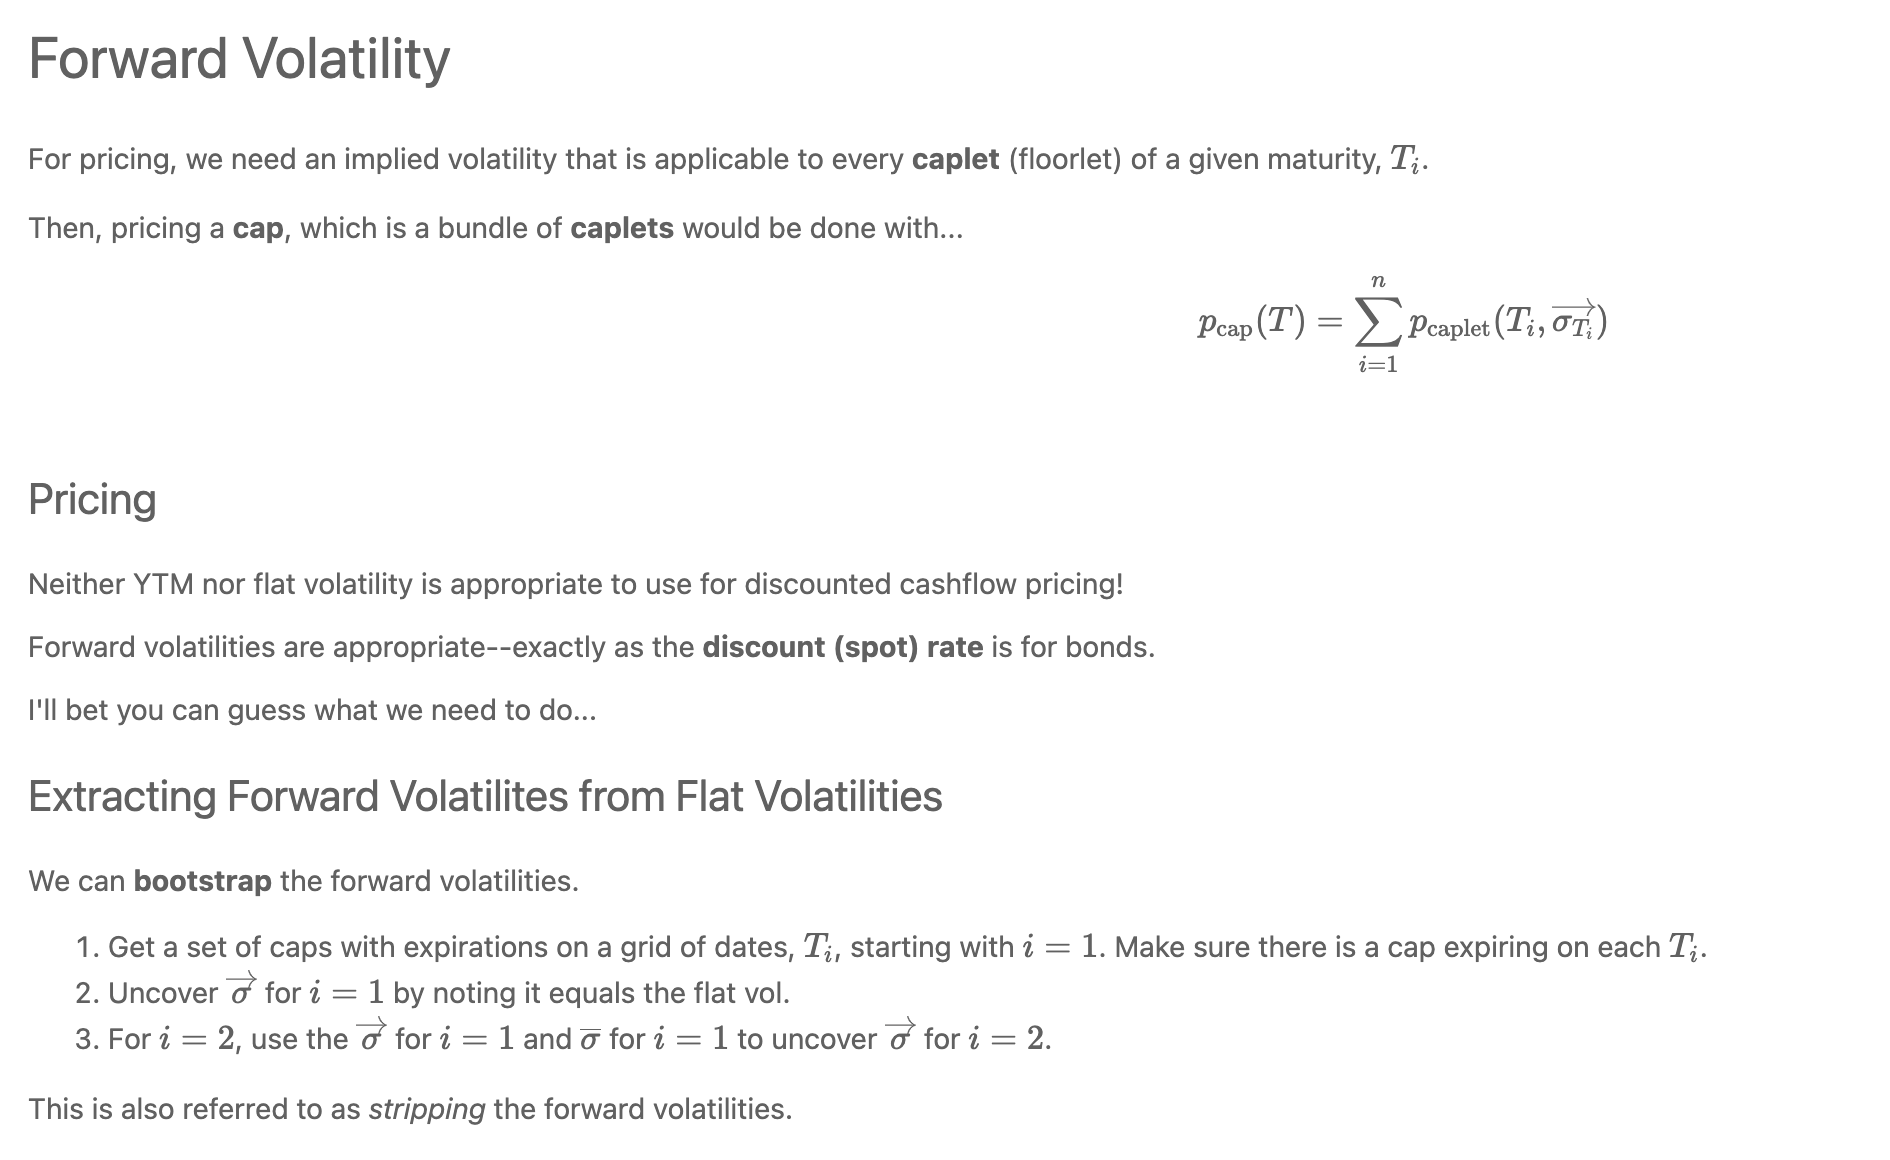

![Screenshot 2025-02-16 at 2.55.55 PM.png](<attachment:Screenshot 2025-02-16 at 2.55.55 PM.png>)
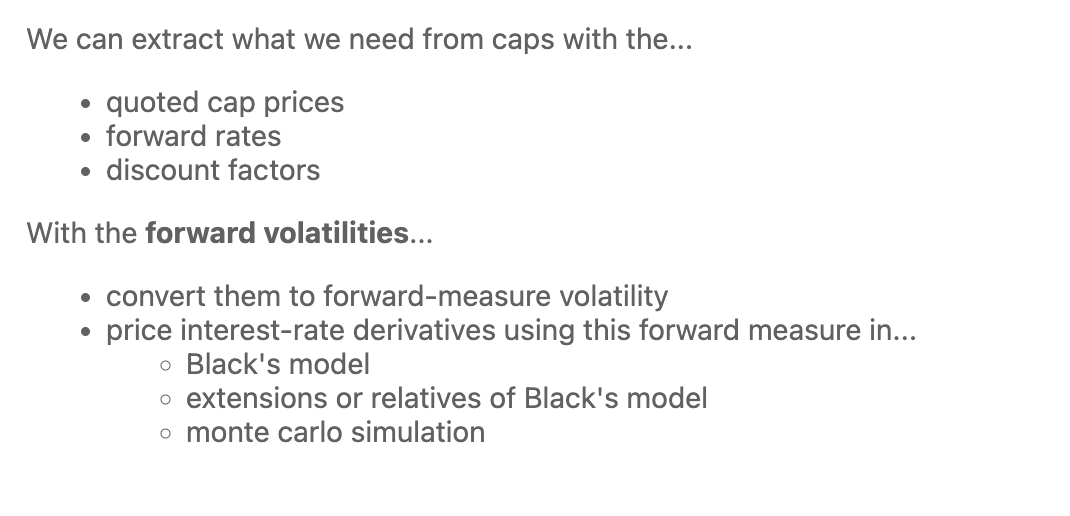

### Go over the flat to forward vol function ###

In [1]:
import numpy as np
import pandas as pdf

import sys
sys.path.insert(0, '../cmds')
from ficcvol import *
#from binomial import *
from ratecurves import *

import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
DATE = '2025-01-31'
curves = pd.read_excel(f'../data/cap_curves_{DATE}.xlsx', sheet_name=f'rate curves {DATE}').set_index('tenor')

In [3]:
curves.head()

,swap rates,spot rates,discounts,forwards,flat vols,fwd vols
tenor,,,,,,
0.25,0.042340,0.042340,0.989526,NaN,NaN,NaN
0.50,0.041854,0.041852,0.979398,0.041364,0.101500,0.101500
0.75,0.041404,0.041397,0.969584,0.040489,0.116946,0.128478
1.00,0.041029,0.041018,0.960012,0.039882,0.132391,0.154562
1.25,0.040458,0.040438,0.950950,0.038117,0.159421,0.219138


In order to get the forward volatilities we need to extract them from the flat vols. We will grab the cap prices from these flat vols at each step.

In [7]:
def flat_to_forward_vol_rev(flatvols, strikes, fwds, discounts, freq=None, notional=100, returnCaplets=False):
    
    # Warn the user if frequency is not set to 4 (quarterly caps)
    if freq != 4:
        display('Warning: freq parameter controls timegrid and cap timing.')
        
    # Define the time step based on frequency
    dt = 1 / freq  # e.g., for quarterly caps, dt = 0.25 (quarter of a year)
    
    # Initialize output DataFrames
    out = pd.DataFrame(dtype=float, index=flatvols.index, columns=['fwd vols', 'cap prices'])
    caplets = pd.DataFrame(dtype=float, index=flatvols.index, columns=strikes.values)
    
    # Identify the first caplet that should be priced (excluding the first missing caplet)
    first_cap = flatvols.index.get_loc(2 * dt)  # The first caplet starts at 2*dt (e.g., 0.5 years for quarterly caps)
    
    # Iterate over each maturity step
    for step, t in enumerate(flatvols.index):
        
        # If before the first caplet, store NaN values as they are not part of pricing
        if step < first_cap:
            out.loc[t, 'cap prices'] = np.nan
            out.loc[t, 'fwd vols'] = np.nan
            tprev = t  # Keep track of the previous time step
        else:
            # Compute the cap price using Black-76 formula (cap_vol_to_price function is assumed to be defined elsewhere)
            out.loc[t, 'cap prices'] = cap_vol_to_price(
                flatvols.loc[t], strikes.loc[t], fwds.loc[:t], discounts.loc[:t], dt=dt, notional=notional
            )
            
            # First caplet: Assign flat volatility directly
            if step == first_cap:
                out.loc[t, 'fwd vols'] = flatvols.loc[t]  # Assign the flat volatility
                caplets.loc[t, strikes.loc[t]] = out.loc[t, 'cap prices']  # Store the cap price as the first caplet
                tprev = t  # Update previous time step
            else:
                # For subsequent caplets, compute individual caplet prices
                strikeT = strikes.loc[t]  # Strike rate for the current tenor
                
                # Compute caplet prices for past tenors using Black-76 formula
                for j in flatvols.index[first_cap:step]:
                    caplets.loc[j, strikeT] = price_caplet(
                        j - dt, out.loc[j, 'fwd vols'], strikeT, fwds.loc[j], discounts.loc[j],
                        freq=freq, notional=notional
                    )
                
                # Compute the final caplet price for the current maturity as the difference
                caplets.loc[t, strikeT] = out.loc[t, 'cap prices'] - caplets.loc[:tprev, strikeT].sum()
                
                # Define the function to solve for forward volatility using root-finding
                wrapper = lambda vol: caplets.loc[t, strikeT] - price_caplet(
                    tprev, vol, strikeT, fwds.loc[t], discounts.loc[t], freq=freq, notional=notional
                )
                
                # Solve for the forward volatility using fsolve
                out.loc[t, 'fwd vols'] = fsolve(wrapper, out.loc[tprev, 'fwd vols'])[0]
                
                # Update previous time step
                tprev = t
                
    # Insert flat volatilities in the output DataFrame
    out.insert(0, 'flat vols', flatvols)
    
    # Return caplet prices if requested
    if returnCaplets:
        return out, caplets
    else:
        return out
